In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
import torch
import skimage
import torch.nn.functional as F
from PIL import Image
from fastai.callback.tensorboard import TensorBoardProjectorCallback
import tensorboard as tb

In [2]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo2Oversampling/Completo')
dls = ImageDataLoaders.from_folder(path, train='train', valid='valid', bs=9, seed=41)

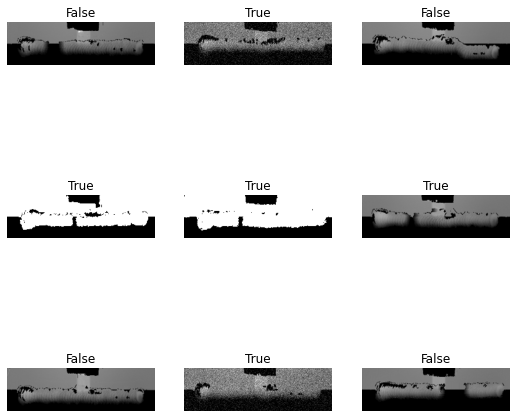

In [3]:
dls.show_batch()

In [4]:
precision = Precision()
f1 = F1Score()

In [5]:
learn = cnn_learner(dls, models.resnet34,normalize=True,pretrained=True,
                    metrics=[accuracy, precision, f1],opt_func=SGD)

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=6.309573450380412e-07)

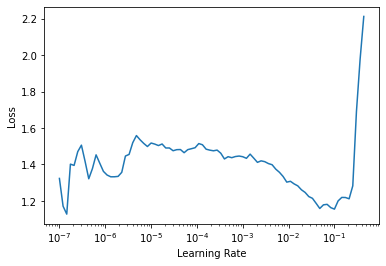

In [6]:
learn.lr_find()

In [7]:
learn.fit(5, lr=0.005)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.399175,0.184146,0.925899,0.745763,0.773626,00:20
1,0.200719,0.115362,0.956115,0.954023,0.844784,00:20
2,0.140842,0.079936,0.971223,0.859438,0.914530,00:21
3,0.128162,0.089927,0.969065,0.846457,0.909091,00:20
4,0.111327,0.042507,0.987050,0.942731,0.959641,00:20


In [8]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo2Oversampling/Completo/valid/')
imagenes = get_image_files(path)
random.shuffle(imagenes)
imagenes = imagenes[:200]
dl = learn.dls.test_dl(imagenes, with_labels=True)

In [9]:
cbs = [TensorBoardProjectorCallback(log_dir='runs/final/')]

In [10]:
_ = learn.get_preds(dl=dl, cbs=cbs)

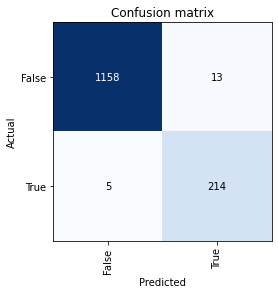

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Resultado obtenido en TensorBoard
![title](imgs/TensorBoard.png)